In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/Taitanic_train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [4]:
data['Embarked'] = data['Embarked'].fillna('S')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
data = data[['Survived', 'Pclass','Sex', 'Age','SibSp','Parch','Embarked']]

In [8]:
data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C


In [9]:
data['family'] = data['SibSp'] + data['Parch'] + 1

In [10]:
data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,family
0,0,3,male,22.0,1,0,S,2
1,1,1,female,38.0,1,0,C,2


In [11]:
data.drop(['SibSp','Parch'], axis=1, inplace=True)

In [12]:
def age_dist(age):
    if 0 <= age <10:
        return 'under10s'
    elif 10 <= age < 20:
        return '10s'
    elif 20 <= age < 30:
        return '20s'
    elif 30 <= age < 40:
        return '30s'
    elif 40 <= age < 50:
        return '40s'
    elif 50 <= age < 60:
        return '50s'
    elif 60 <= age < 70:
        return '60s'
    elif 70 <= age < 80:
        return '70s'
    elif 80 <= age < 90:
        return '80s'

In [13]:
data['Age'] = data['Age'].apply(age_dist)

In [14]:
data.head(2)

,Survived,Pclass,Sex,Age,Embarked,family
0,0,3,male,20s,S,2
1,1,1,female,30s,C,2


In [16]:
data = pd.get_dummies(data, drop_first=True)
data.head(2)

,Survived,Pclass,family,Sex_male,Age_20s,Age_30s,Age_40s,Age_50s,Age_60s,Age_70s,Age_80s,Age_under10s,Embarked_Q,Embarked_S
0,0,3,2,1,1,0,0,0,0,0,0,0,0,1
1,1,1,2,0,0,1,0,0,0,0,0,0,0,0


In [17]:
X = data.drop('Survived', axis=1)
y = data['Survived']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=7)

In [19]:
dtc = DecisionTreeClassifier(max_depth=3, random_state=7)
dtc.fit(X_train, y_train)
pred_dtc = dtc.predict(X_test)
print(accuracy_score(y_test, pred_dtc))
print(classification_report(y_test, pred_dtc))

0.770949720670391
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       110
           1       0.74      0.62      0.68        69

    accuracy                           0.77       179
   macro avg       0.76      0.74      0.75       179
weighted avg       0.77      0.77      0.77       179



In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
rfc = RandomForestClassifier(max_depth=6, n_estimators=1000, criterion="entropy",n_jobs=-1, random_state=10)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print(accuracy_score(y_test, pred_rfc))
print(classification_report(y_test, pred_rfc))

0.770949720670391
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       110
           1       0.74      0.62      0.68        69

    accuracy                           0.77       179
   macro avg       0.76      0.74      0.75       179
weighted avg       0.77      0.77      0.77       179



# tensorflow Sequential API 를 사용한 순차적 모델

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [23]:
X_train.shape  # 712 행의 13개 컬럼

(712, 13)

In [24]:
X_train.shape[1]

13

In [39]:
# 딥러닝 신경망 모델 정의
model = Sequential()
# 입력층
model.add(Dense(30, input_dim=X_train.shape[1],activation='relu'))  # input_dim: 독립변수의 컬럼 수 X의 수
model.add(Dense(60, activation='relu')) # 은닉층 1
model.add(Dense(30, activation='relu')) # 은닉층 2
model.add(Dense(15, activation='relu')) # 은닉층 3
model.add(Dense(1, activation='sigmoid')) # 출력층 sigmoid: 이진분류


In [40]:
# 신경망 훈련시 사용할 파라미터 세팅
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                420       
                                                                 
 dense_5 (Dense)             (None, 60)                1860      
                                                                 
 dense_6 (Dense)             (None, 30)                1830      
                                                                 
 dense_7 (Dense)             (None, 15)                465       
                                                                 
 dense_8 (Dense)             (None, 1)                 16        
                                                                 
Total params: 4,591
Trainable params: 4,591
Non-trainable params: 0
_________________________________________________________________


In [44]:
history = model.fit(X_train, y_train, epochs=200, batch_size=20, validation_data=(X_test, y_test))

Epoch 1/200
36/36 [==============================] - 0s 3ms/step - loss: 0.3560 - accuracy: 0.8497 - val_loss: 0.5929 - val_accuracy: 0.7765
Epoch 2/200
36/36 [==============================] - 0s 2ms/step - loss: 0.3566 - accuracy: 0.8399 - val_loss: 0.6106 - val_accuracy: 0.7709
Epoch 3/200
36/36 [==============================] - 0s 2ms/step - loss: 0.3562 - accuracy: 0.8497 - val_loss: 0.5824 - val_accuracy: 0.7709
Epoch 4/200
36/36 [==============================] - 0s 2ms/step - loss: 0.3460 - accuracy: 0.8511 - val_loss: 0.5704 - val_accuracy: 0.7877
Epoch 5/200
36/36 [==============================] - 0s 2ms/step - loss: 0.3344 - accuracy: 0.8511 - val_loss: 0.6810 - val_accuracy: 0.7486
Epoch 6/200
36/36 [==============================] - 0s 2ms/step - loss: 0.3425 - accuracy: 0.8624 - val_loss: 0.6133 - val_accuracy: 0.7318
Epoch 7/200
36/36 [==============================] - 0s 2ms/step - loss: 0.3289 - accuracy: 0.8638 - val_loss: 0.6268 - val_accuracy: 0.7486
Epoch 8/200
3

Epoch 59/200
36/36 [==============================] - 0s 2ms/step - loss: 0.3114 - accuracy: 0.8624 - val_loss: 0.6741 - val_accuracy: 0.7598
Epoch 60/200
36/36 [==============================] - 0s 2ms/step - loss: 0.3080 - accuracy: 0.8694 - val_loss: 0.6799 - val_accuracy: 0.7654
Epoch 61/200
36/36 [==============================] - 0s 2ms/step - loss: 0.3053 - accuracy: 0.8666 - val_loss: 0.6681 - val_accuracy: 0.7765
Epoch 62/200
36/36 [==============================] - 0s 2ms/step - loss: 0.3105 - accuracy: 0.8596 - val_loss: 0.6764 - val_accuracy: 0.7933
Epoch 63/200
36/36 [==============================] - 0s 2ms/step - loss: 0.3110 - accuracy: 0.8624 - val_loss: 0.6905 - val_accuracy: 0.7598
Epoch 64/200
36/36 [==============================] - 0s 2ms/step - loss: 0.3004 - accuracy: 0.8680 - val_loss: 0.6998 - val_accuracy: 0.7654
Epoch 65/200
36/36 [==============================] - 0s 2ms/step - loss: 0.3027 - accuracy: 0.8666 - val_loss: 0.7001 - val_accuracy: 0.7598
Epoch 

36/36 [==============================] - 0s 3ms/step - loss: 0.2904 - accuracy: 0.8722 - val_loss: 0.7996 - val_accuracy: 0.7765
Epoch 174/200
36/36 [==============================] - 0s 2ms/step - loss: 0.2842 - accuracy: 0.8722 - val_loss: 0.7901 - val_accuracy: 0.7765
Epoch 175/200
36/36 [==============================] - 0s 2ms/step - loss: 0.2853 - accuracy: 0.8750 - val_loss: 0.8571 - val_accuracy: 0.7654
Epoch 176/200
36/36 [==============================] - 0s 2ms/step - loss: 0.2852 - accuracy: 0.8736 - val_loss: 0.7946 - val_accuracy: 0.7709
Epoch 177/200
36/36 [==============================] - 0s 2ms/step - loss: 0.2886 - accuracy: 0.8708 - val_loss: 0.7917 - val_accuracy: 0.7765
Epoch 178/200
36/36 [==============================] - 0s 2ms/step - loss: 0.2939 - accuracy: 0.8694 - val_loss: 0.8252 - val_accuracy: 0.7654
Epoch 179/200
36/36 [==============================] - 0s 2ms/step - loss: 0.2886 - accuracy: 0.8666 - val_loss: 0.7715 - val_accuracy: 0.7765
Epoch 180/200

딥러닝 모델 성능평가
* 딥러닝에서 모델의 정확성을 보는 지표는 loss
* 보통 loss가 낮으면 accuracy가 올라가지만 비례하지 않을 때도 있음.
* 두 지표간 차이가 있을 경우 loss가 낮은 모델이 우수한 모델

In [45]:
score = model.evaluate(X_test, y_test)
print('test loss', score[0])
print('test accuracy', score[1])

6/6 [==============================] - 0s 0s/step - loss: 0.8081 - accuracy: 0.7709
test loss 0.8081468343734741
test accuracy 0.7709497213363647


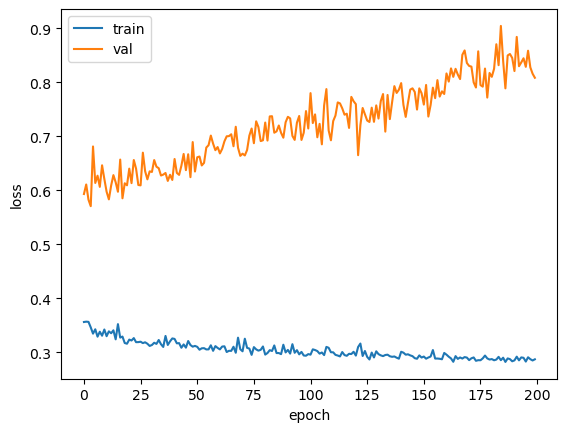

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [47]:
pred = model.predict(X_test)
print(pred.shape)

6/6 [==============================] - 0s 0s/step
(179, 1)


In [48]:
pred = pd.DataFrame(pred)
pred = pred[0].apply(lambda x: 1 if x >= 0.5 else 0)

In [49]:
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.770949720670391
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       110
           1       0.75      0.61      0.67        69

    accuracy                           0.77       179
   macro avg       0.77      0.74      0.75       179
weighted avg       0.77      0.77      0.77       179



# Tensorflow Functional API를 이용한 함수형 모델
* Sequential API는 단순히 층을 여러개 쌓는 형태라 복잡한 형태의 모델 생성에 한계가 있음.
* Functional API는 입력층과 출력층을 사용자가 직접 정의가능
* 다중입력(multi-input), 다중출력(multi-output)등 복잡한 모델을 정의할수 있음.
* input(shape=(독립변수 수, )) 로 입력층 정의
* 이전 층을 다음층의 입력으로 사용
* model()에 입력과 출력 정의

In [52]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [53]:
inputs = Input(shape=(X_train.shape[1], )) # 입력층 정의(컬럼(특성,Feature) 14개를 입력으로 받음)
x = Dense(30, activation='relu')(inputs) # 은닉층 1번
x = Dense(60, activation='relu')(x) # 은닉층 2번
x = Dense(15, activation='relu')(x) # 은닉층 3번
x = Dense(1, activation='sigmoid')(x) # 출력층
model = Model(inputs, x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense_9 (Dense)             (None, 30)                420       
                                                                 
 dense_10 (Dense)            (None, 60)                1860      
                                                                 
 dense_11 (Dense)            (None, 15)                915       
                                                                 
 dense_12 (Dense)            (None, 1)                 16        
                                                                 
Total params: 3,211
Trainable params: 3,211
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=400, batch_size=100, validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test)
print('test_loss:', score[0])
print('test_accuracy:', score[1])
pred = model.predict(X_test)
pred = pd.DataFrame(pred)
pred = pred[0].apply(lambda x: 1 if x > 0.5 else 0)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

Epoch 1/400
8/8 [==============================] - 1s 24ms/step - loss: 0.6653 - accuracy: 0.6124 - val_loss: 0.6415 - val_accuracy: 0.6145
Epoch 2/400
8/8 [==============================] - 0s 5ms/step - loss: 0.6390 - accuracy: 0.6166 - val_loss: 0.6262 - val_accuracy: 0.6145
Epoch 3/400
8/8 [==============================] - 0s 5ms/step - loss: 0.6229 - accuracy: 0.6166 - val_loss: 0.6176 - val_accuracy: 0.6145
Epoch 4/400
8/8 [==============================] - 0s 5ms/step - loss: 0.6123 - accuracy: 0.6166 - val_loss: 0.6103 - val_accuracy: 0.6145
Epoch 5/400
8/8 [==============================] - 0s 5ms/step - loss: 0.5996 - accuracy: 0.6180 - val_loss: 0.6036 - val_accuracy: 0.6089
Epoch 6/400
8/8 [==============================] - 0s 5ms/step - loss: 0.5877 - accuracy: 0.6222 - val_loss: 0.5975 - val_accuracy: 0.6089
Epoch 7/400
8/8 [==============================] - 0s 5ms/step - loss: 0.5757 - accuracy: 0.6503 - val_loss: 0.5909 - val_accuracy: 0.6369
Epoch 8/400
8/8 [=========

8/8 [==============================] - 0s 5ms/step - loss: 0.3454 - accuracy: 0.8581 - val_loss: 0.5231 - val_accuracy: 0.7709
Epoch 118/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3427 - accuracy: 0.8539 - val_loss: 0.5247 - val_accuracy: 0.7654
Epoch 119/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3420 - accuracy: 0.8581 - val_loss: 0.5321 - val_accuracy: 0.7709
Epoch 120/400
8/8 [==============================] - 0s 7ms/step - loss: 0.3441 - accuracy: 0.8497 - val_loss: 0.5253 - val_accuracy: 0.7765
Epoch 121/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3433 - accuracy: 0.8539 - val_loss: 0.5227 - val_accuracy: 0.7765
Epoch 122/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3439 - accuracy: 0.8497 - val_loss: 0.5319 - val_accuracy: 0.7709
Epoch 123/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3467 - accuracy: 0.8581 - val_loss: 0.5372 - val_accuracy: 0.7709
Epoch 124/400
8/8 [========

8/8 [==============================] - 0s 7ms/step - loss: 0.3150 - accuracy: 0.8722 - val_loss: 0.5625 - val_accuracy: 0.7821
Epoch 234/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3143 - accuracy: 0.8722 - val_loss: 0.5584 - val_accuracy: 0.7933
Epoch 235/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3122 - accuracy: 0.8680 - val_loss: 0.5675 - val_accuracy: 0.8101
Epoch 236/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3163 - accuracy: 0.8652 - val_loss: 0.5665 - val_accuracy: 0.7821
Epoch 237/400
8/8 [==============================] - 0s 3ms/step - loss: 0.3131 - accuracy: 0.8666 - val_loss: 0.5652 - val_accuracy: 0.7821
Epoch 238/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3141 - accuracy: 0.8680 - val_loss: 0.5706 - val_accuracy: 0.7765
Epoch 239/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3137 - accuracy: 0.8694 - val_loss: 0.5820 - val_accuracy: 0.7765
Epoch 240/400
8/8 [========

8/8 [==============================] - 0s 5ms/step - loss: 0.3074 - accuracy: 0.8652 - val_loss: 0.6192 - val_accuracy: 0.7989
Epoch 350/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3160 - accuracy: 0.8680 - val_loss: 0.6114 - val_accuracy: 0.7877
Epoch 351/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3027 - accuracy: 0.8722 - val_loss: 0.6049 - val_accuracy: 0.7877
Epoch 352/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3068 - accuracy: 0.8638 - val_loss: 0.6207 - val_accuracy: 0.7877
Epoch 353/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3020 - accuracy: 0.8638 - val_loss: 0.6194 - val_accuracy: 0.7821
Epoch 354/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3006 - accuracy: 0.8722 - val_loss: 0.6185 - val_accuracy: 0.7877
Epoch 355/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3017 - accuracy: 0.8722 - val_loss: 0.6210 - val_accuracy: 0.7989
Epoch 356/400
8/8 [========

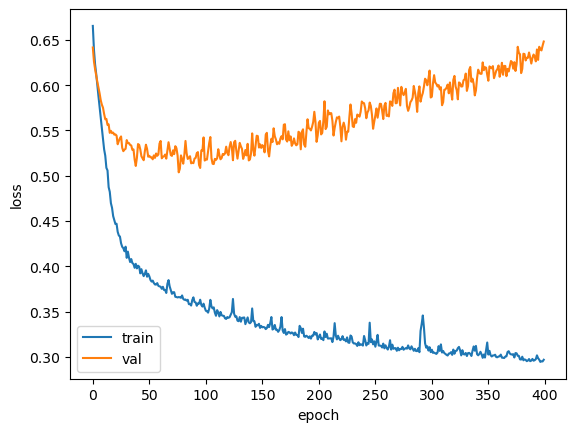

In [56]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

# Model Subclassing API 로 모델 만들기
* class 형태의 모델 정의 방법
* tf.keras.Model을 상속받아 작성한다.

In [60]:
class Titanic(tf.keras.Model):
    
    def __init__(self):
        super(Titanic, self).__init__()
        self.dense1 = tf.keras.layers.Dense(30, activation='relu')
        self.dense2 = tf.keras.layers.Dense(60, activation='relu')
        self.dense3 = tf.keras.layers.Dense(15, activation='relu')
        self.classifier = tf.keras.layers.Dense(1, activation='sigmoid')
        
    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        return self.classifier(x)

In [61]:
model = Titanic()  # Titanic 클래스 사용

Epoch 1/400
8/8 [==============================] - 1s 22ms/step - loss: 0.6943 - accuracy: 0.5084 - val_loss: 0.6501 - val_accuracy: 0.6145
Epoch 2/400
8/8 [==============================] - 0s 5ms/step - loss: 0.6485 - accuracy: 0.6166 - val_loss: 0.6258 - val_accuracy: 0.6145
Epoch 3/400
8/8 [==============================] - 0s 5ms/step - loss: 0.6235 - accuracy: 0.6166 - val_loss: 0.6102 - val_accuracy: 0.6313
Epoch 4/400
8/8 [==============================] - 0s 5ms/step - loss: 0.6019 - accuracy: 0.6545 - val_loss: 0.6031 - val_accuracy: 0.6704
Epoch 5/400
8/8 [==============================] - 0s 5ms/step - loss: 0.5843 - accuracy: 0.6980 - val_loss: 0.5904 - val_accuracy: 0.6816
Epoch 6/400
8/8 [==============================] - 0s 5ms/step - loss: 0.5692 - accuracy: 0.7065 - val_loss: 0.5823 - val_accuracy: 0.6927
Epoch 7/400
8/8 [==============================] - 0s 7ms/step - loss: 0.5496 - accuracy: 0.7388 - val_loss: 0.5737 - val_accuracy: 0.7207
Epoch 8/400
8/8 [=========

8/8 [==============================] - 0s 4ms/step - loss: 0.3334 - accuracy: 0.8652 - val_loss: 0.5547 - val_accuracy: 0.7709
Epoch 118/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3309 - accuracy: 0.8610 - val_loss: 0.5626 - val_accuracy: 0.7765
Epoch 119/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3287 - accuracy: 0.8666 - val_loss: 0.5650 - val_accuracy: 0.7654
Epoch 120/400
8/8 [==============================] - 0s 3ms/step - loss: 0.3296 - accuracy: 0.8680 - val_loss: 0.5562 - val_accuracy: 0.7765
Epoch 121/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3314 - accuracy: 0.8610 - val_loss: 0.5525 - val_accuracy: 0.7765
Epoch 122/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3341 - accuracy: 0.8722 - val_loss: 0.5671 - val_accuracy: 0.7598
Epoch 123/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3299 - accuracy: 0.8680 - val_loss: 0.5694 - val_accuracy: 0.7877
Epoch 124/400
8/8 [========

8/8 [==============================] - 0s 5ms/step - loss: 0.3045 - accuracy: 0.8764 - val_loss: 0.6388 - val_accuracy: 0.7654
Epoch 234/400
8/8 [==============================] - 0s 6ms/step - loss: 0.3044 - accuracy: 0.8736 - val_loss: 0.6419 - val_accuracy: 0.7542
Epoch 235/400
8/8 [==============================] - 0s 3ms/step - loss: 0.3050 - accuracy: 0.8722 - val_loss: 0.6420 - val_accuracy: 0.7598
Epoch 236/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3069 - accuracy: 0.8652 - val_loss: 0.6470 - val_accuracy: 0.7542
Epoch 237/400
8/8 [==============================] - 0s 3ms/step - loss: 0.3074 - accuracy: 0.8638 - val_loss: 0.6500 - val_accuracy: 0.7654
Epoch 238/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3024 - accuracy: 0.8680 - val_loss: 0.6359 - val_accuracy: 0.7542
Epoch 239/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3038 - accuracy: 0.8708 - val_loss: 0.6494 - val_accuracy: 0.7542
Epoch 240/400
8/8 [========

8/8 [==============================] - 0s 5ms/step - loss: 0.2971 - accuracy: 0.8722 - val_loss: 0.7044 - val_accuracy: 0.7542
Epoch 350/400
8/8 [==============================] - 0s 5ms/step - loss: 0.2948 - accuracy: 0.8694 - val_loss: 0.7103 - val_accuracy: 0.7654
Epoch 351/400
8/8 [==============================] - 0s 5ms/step - loss: 0.3027 - accuracy: 0.8680 - val_loss: 0.7201 - val_accuracy: 0.7654
Epoch 352/400
8/8 [==============================] - 0s 6ms/step - loss: 0.3056 - accuracy: 0.8666 - val_loss: 0.7317 - val_accuracy: 0.7486
Epoch 353/400
8/8 [==============================] - 0s 3ms/step - loss: 0.3003 - accuracy: 0.8680 - val_loss: 0.7345 - val_accuracy: 0.7542
Epoch 354/400
8/8 [==============================] - 0s 5ms/step - loss: 0.2998 - accuracy: 0.8708 - val_loss: 0.7223 - val_accuracy: 0.7654
Epoch 355/400
8/8 [==============================] - 0s 5ms/step - loss: 0.2953 - accuracy: 0.8736 - val_loss: 0.7157 - val_accuracy: 0.7598
Epoch 356/400
8/8 [========

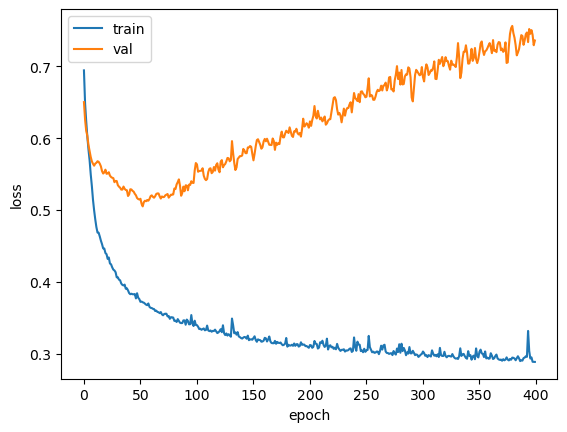

In [62]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=400, batch_size=100, validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test)
print('test_loss:', score[0])
print('test_accuracy:', score[1])
pred = model.predict(X_test)
pred = pd.DataFrame(pred)
pred = pred[0].apply(lambda x: 1 if x > 0.5 else 0)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()